# [Applied Statistics](https://lamastex.github.io/scalable-data-science/as/2019/)
## 1MS926, Spring 2019, Uppsala University 
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 06. Statistics from Data: Fetching New Zealand Earthquakes & Live Play with `data/`


- Live Data-fetch of NZ EQ Data
- More on Statistics
- Sample Mean
- Sample Variance
- Order Statistics
- Frequencies
- Empirical Mass Function
- Empirical Distribution Function
- List Comprehensions
- New Zealand Earthquakes
- Live Play with `data/`
  - Swedish election data
  - Biergartens in Germany
 


# Live Data-fetching Exercise Now

Go to [https://quakesearch.geonet.org.nz/](https://quakesearch.geonet.org.nz/) and download data on NZ earthquakes.

<img src = "images/GeoNetQuakeSearchDownloadCSV.png" width =800>

In my attempt above to zoom out to include both islands of New Zealand (NZ) and get one year of data using the `Last Year` button choice from this site:
 - [https://quakesearch.geonet.org.nz/](https://quakesearch.geonet.org.nz/)
and hitting `Search` box gave the following URLs for downloading data. I used the `DOWNLOAD` button to get my own data in Outpur Format `CSV` as chosen earlier.

https://quakesearch.geonet.org.nz/csv?bbox=163.52051,-49.23912,182.19727,-32.36140&startdate=2017-06-01&enddate=2018-05-17T14:00:00
https://quakesearch.geonet.org.nz/csv?bbox=163.52051,-49.23912,182.19727,-32.36140&startdate=2017-5-17T13:00:00&enddate=2017-06-01

## What should you do now?

Try to `DOWNLOAD` your own `CSV` data and store it in a file named **`my_earthquakes.csv`** (NOTE: rename the file when you download so you don't replace the file `earthquakes.csv`!) inside the folder named **`data`** that is inside the same directory that this notebook is in.

In [52]:
%%sh
# print working directory
pwd

/Users/raazsainudiin/all/git/private/admin/uu/courses/2019Spring_AppliedStats-STS/_as/master/jp


In [53]:
%%sh
ls # list contents of working directory

00.ipynb
01.ipynb
02.ipynb
03.ipynb
04.ipynb
05.ipynb
06.ipynb
07.ipynb
data
images
myHist.png


In [54]:
%%sh
# after download you should have the following file in directory named data
ls data

co2_mm_mlo.txt
earthquakes.csv.zip
earthquakes.tgz
earthquakes_small.csv
final.csv
final.csv.zip
final.tgz
pride_and_prejudice.txt
rainfallInChristchurch.csv


In [55]:
%%sh  
# first three lines
head -3 data/earthquakes_small.csv

publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
2018p371534,,2018-05-18T11:13:48.826Z,2018-05-18T11:15:55.741Z,176.469659,-38.10063545,2.123583253,93.125,M,,NonLinLoc,,automatic,nz3drx,18,18,11,0.3996779802,94.08602902,1.036195008,0
2018p371524,,2018-05-18T11:08:07.588Z,2018-05-18T11:11:14.319Z,176.4213445,-38.63584892,2.570467678,35.9375,M,,NonLinLoc,,automatic,nz3drx,22,22,11,0.3208135882,89.12864378,1.012353739,0


In [56]:
%%sh 
# last three lines
tail -3 data/earthquakes_small.csv

2018p352775,,2018-05-11T12:38:54.732Z,2018-05-11T12:40:28.518Z,175.6063627,-40.81585537,1.835272336,13.671875,M,,NonLinLoc,,automatic,nz3drx,22,22,12,0.1097369199,84.14006379,0.3314536834,0
2018p352725,,2018-05-11T12:12:36.343Z,2018-05-11T12:14:42.372Z,176.0372811,-38.78743116,2.103529946,76.25,M,,NonLinLoc,,automatic,nz3drx,17,17,4,0.4257033383,244.4056741,1.445270768,0
2018p352684,,2018-05-11T11:50:06.019Z,2018-05-11T11:51:41.163Z,176.5437111,-40.07042442,1.503468463,13.671875,M,,NonLinLoc,,automatic,nz3drx,13,13,7,0.079302248,81.46123042,0.4485324555,0


In [57]:
%%sh  
# number of lines in the file; menmonic from `man wc` is wc = word-count option=-l is for lines
wc -l  data/earthquakes_small.csv

411 data/earthquakes_small.csv


In [46]:
#%%sh
#man wc

## Let's analyse the measured earth quakes in `data/earthquakes.csv`

This will ensure we are all looking at the same file!

But feel free to play with your own `data/my_earthquakes.csv` on the side.

### Exercise:
Grab origin-time, lat, lon, magnitude, depth

In [58]:
with open("data/earthquakes_small.csv") as f:
    reader = f.read()
    
dataList = reader.split('\n')

In [59]:
len(dataList)

412

In [60]:
dataList[0]

'publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty'

In [61]:
myDataAccumulatorList =[]
for data in dataList[1:-2]:
    dataRow = data.split(',')
    myData = [dataRow[4],dataRow[5],dataRow[6]]#,dataRow[7]]
    myFloatData = tuple([float(x) for x in myData])
    myDataAccumulatorList.append(myFloatData)

In [51]:
points(myDataAccumulatorList)

Graphics3d Object

# More on Statistics

Recall that a statistic is any measureable function of the data: $T(x): \mathbb{X} \rightarrow \mathbb{T}$.

Thus, a statistic $T$ is also an RV that takes values in the space $\mathbb{T}$.

When $x \in \mathbb{X}$ is the observed data, $T(x)=t$ is the observed statistic of the observed data $x$.


# Let's Play Live with other datasets, shall we?

# Swedish 2018 National Election Data



## Swedish Election Outcomes 2018

See: [http://www.lamastex.org/datasets/public/elections/2018/sv/README](http://www.lamastex.org/datasets/public/elections/2018/sv/README)!

This was obtained by processing using the scripts at:

- https://gitlab.com/tilo.wiklund/swedis-election-data-scraping

You already have this dataset in your `/data` directory.

In [62]:
%%sh
cd data
# if you don't see final.csv in data/ below
# then either uncomment and try the next line in linux/Mac OSX
#tar -zxvf final.tgz
# or try the next line after uncommenting it to extract final.csv
# unzip final.csv.zip
ls -al

total 9540
drwxr-xr-x 11 sage sage     352 Feb 11 22:43 .
drwxr-xr-x 14 sage sage     448 Feb 12 11:01 ..
-rw-r--r--  1 sage sage   50555 Jan 22 19:58 co2_mm_mlo.txt
-rw-r--r--  1 sage sage 1344114 Jan 23 14:15 earthquakes.csv.zip
-rw-r--r--  1 sage sage 1344959 Jan 23 14:15 earthquakes.tgz
-rw-r--r--  1 sage sage   77786 Jan 21 13:41 earthquakes_small.csv
-rw-r--r--  1 sage sage 4894689 Nov  9 11:50 final.csv
-rw-r--r--  1 sage sage  467572 Jan 23 12:56 final.csv.zip
-rw-r--r--  1 sage sage  467611 Jan 23 12:56 final.tgz
-rw-r--r--  1 sage sage  724725 Jan 22 18:43 pride_and_prejudice.txt
-rw-r--r--  1 sage sage  376954 Jan 21 13:41 rainfallInChristchurch.csv


In [63]:
%%sh
wc data/final.csv
head data/final.csv

  82226  461865 4894689 data/final.csv
region,municipality,district,party,votes
Blekinge län,Karlshamn,0 - Centrala Asarum,S,519
Blekinge län,Karlshamn,0 - Centrala Asarum,SD,311
Blekinge län,Karlshamn,0 - Centrala Asarum,M,162
Blekinge län,Karlshamn,0 - Centrala Asarum,V,82
Blekinge län,Karlshamn,0 - Centrala Asarum,KD,53
Blekinge län,Karlshamn,0 - Centrala Asarum,C,37
Blekinge län,Karlshamn,0 - Centrala Asarum,L,37
Blekinge län,Karlshamn,0 - Centrala Asarum,MP,32
Blekinge län,Karlshamn,0 - Centrala Asarum,BLANK,13


## Counting total votes per party
Let's quickly load the data using [`csv.reader`](https://docs.python.org/2/library/csv.html) and count the number of votes for each party over all of Sweden next.

In [64]:
import csv, sys

filename = 'data/final.csv'
linesAlreadyRead=0
partyVotesDict={}
with open(filename, 'rb') as f:
    reader = csv.reader(f,delimiter=',',quotechar='"')
    headers = next(reader) # skip first line of header
    try:
        for row in reader:
            linesAlreadyRead+=1
            party=row[3].decode('utf-8') # convert str to unicode
            votes=int(row[4])
            if party in partyVotesDict: # the data value already exists as a key
                partyVotesDict[party] = partyVotesDict[party] + votes # add 1 to the count
            else: # the data value does not exist as a key value
                # add a new key-value pair for this new data value, frequency 1
                partyVotesDict[party] = votes
    except csv.Error as e:
        sys.exit('file %s, line %d: %s' % (filename, reader.line_num, e))

print "lines read = ", linesAlreadyRead

lines read =  82225


In [65]:
# fancy printing of non-ASCII string
for kv in partyVotesDict.items():
    print "party ",kv[0], "\thas a total of votes =\t", kv[1]

party  C 	has a total of votes =	557500
party  KD 	has a total of votes =	409478
party  OG 	has a total of votes =	3342
party  BLANK 	has a total of votes =	53084
party  M 	has a total of votes =	1284698
party  L 	has a total of votes =	355546
party  ÖVR 	has a total of votes =	69472
party  S 	has a total of votes =	1830386
party  MP 	has a total of votes =	285899
party  V 	has a total of votes =	518454
party  FI 	has a total of votes =	29665
party  OGEJ 	has a total of votes =	2120
party  SD 	has a total of votes =	1135627


In [66]:
# let's sort by descending order of votes
for party in sorted(partyVotesDict, key=partyVotesDict.get, reverse=True):
  print party, "\t", partyVotesDict[party]

S 	1830386
M 	1284698
SD 	1135627
C 	557500
V 	518454
KD 	409478
L 	355546
MP 	285899
ÖVR 	69472
BLANK 	53084
FI 	29665
OG 	3342
OGEJ 	2120


# Geospatial adventures

Say you want to visit some places of interest in Germany. This tutorial on [Open Street Map's Overpass API](https://janakiev.com/blog/openstreetmap-with-python-and-overpass-api/) shows you how to get the locations of `"amenity"="biergarten"` in Germany.

We may come back to [https://www.openstreetmap.org](https://www.openstreetmap.org) later. If we don't then you know where to go for openly available data for geospatial statistical analysis.

In [9]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [38]:
#data # uncomment this cell to see the raw JSON

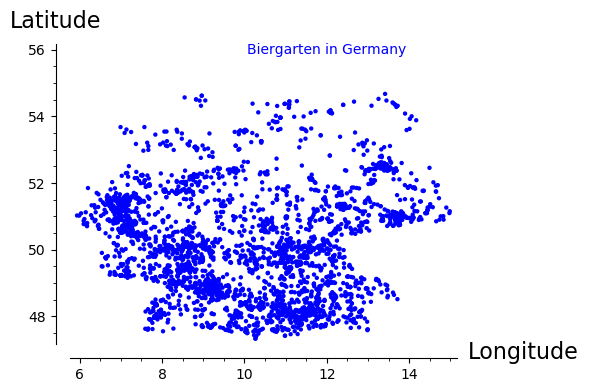

In [39]:
import numpy as np

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

p = points(zip(X[:, 0], X[:, 1]))
p += text('Biergarten in Germany',(12,56))
p.axes_labels(['Longitude','Latitude'])
#plt.axis('equal')
p.show()

## Pubs in Sweden
With a minor modification to the above code we can view `amenity=pub` in Sweden.

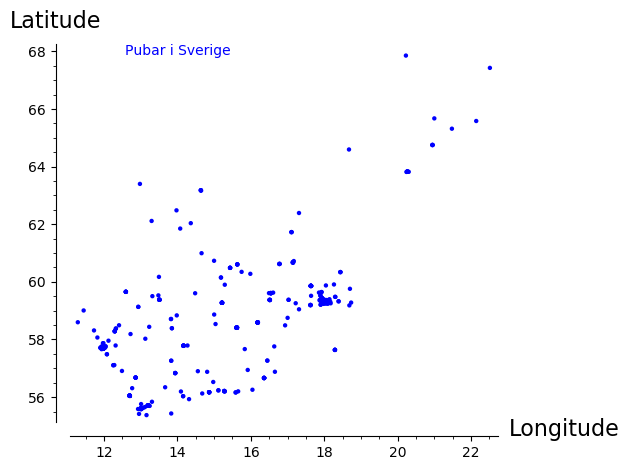

In [1]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="SE"][admin_level=2];
(node["amenity"="pub"](area);
 way["amenity"="pub"](area);
 rel["amenity"="pub"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

import numpy as np

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

p = points(zip(X[:, 0], X[:, 1]))
p += text('Pubar i Sverige',(14,68))
p.axes_labels(['Longitude','Latitude'])
#plt.axis('equal')
p.show()